In [2]:
# vector_fields.py contains a bunch of tools to visualize vector fields and related objects
# this line is mainly needed to run the notebook in google colab or kaggle
_ = !wget https://raw.githubusercontent.com/JeremiasE/worksheets-ode-2025/main/tools/vector_fields.py

In [3]:
import numpy as np
import scipy.integrate as integ
import matplotlib
import sympy
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets
import vector_fields
import skimage.io

In [4]:
(t,x,y) = sympy.var("t,x,y")

# Hamiltonsche Systeme mit komplizierten Phasenportraits

Wir betrachten folgende Hamiltonsche Funktion:

In [5]:
F=8+(x+1)*(x+0)*(x-1)*(y+1)*(y+1/10)*(y-1)+y*x**2+1/10*y
F

x**2*y + x*(x - 1)*(x + 1)*(y - 1)*(y + 0.1)*(y + 1) + 0.1*y + 8

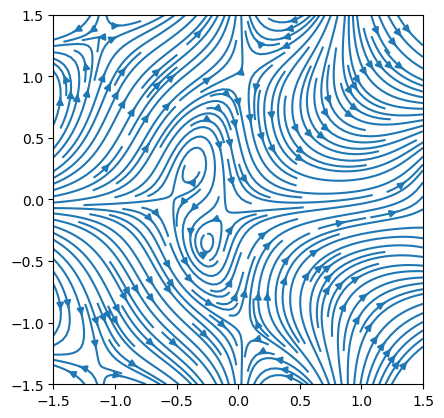

In [6]:
M = F.diff(x)
N = F.diff(y)
ax = vector_fields.plot_streamlines([N,-M],[x,-1.5,1.5],[y,-1.5,1.5],density=2)
ax.set_aspect(1)

# Divergenz

Im folgenden Plotten wir Gradientenfeldern (die Pfeile) zusammen mit ihrer Divergenz (die Färbung des Hintergrunds)

In [7]:
F1=1/(1+x**2)*1/(1+y**2)-1/(1+(x-2)**2)*1/(1+(y-1)**2)
M1 = -F1.diff(x)
N1 = -F1.diff(y)
D1 = M1.diff(x)+N1.diff(y)
F1

-1/(((x - 2)**2 + 1)*((y - 1)**2 + 1)) + 1/((x**2 + 1)*(y**2 + 1))

Als Divergenz ergibt sich hier:

In [8]:
D1

-8*x**2/((x**2 + 1)**3*(y**2 + 1)) - 8*y**2/((x**2 + 1)*(y**2 + 1)**3) + (2 - 2*y)*(4 - 4*y)/(((x - 2)**2 + 1)*((y - 1)**2 + 1)**3) + (4 - 2*x)*(8 - 4*x)/(((x - 2)**2 + 1)**3*((y - 1)**2 + 1)) - 2/(((x - 2)**2 + 1)*((y - 1)**2 + 1)**2) - 2/(((x - 2)**2 + 1)**2*((y - 1)**2 + 1)) + 2/((x**2 + 1)*(y**2 + 1)**2) + 2/((x**2 + 1)**2*(y**2 + 1))

Hier sieht man die Bedeutung als "Quellendichte" sehr deutlich ...

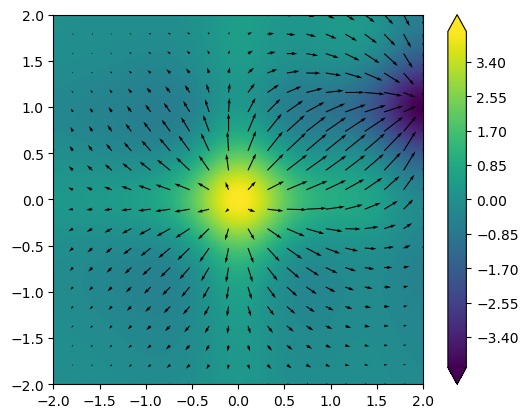

In [9]:
cmap = matplotlib.colormaps["viridis"]
ax,c = vector_fields.plot_contour(D1,(x,-2.2,2.2),(y,-2.2,2.2),levels=200,cmap=cmap,zorder=-100,extend='both')
vector_fields.plot_vector_field([M1,N1],(x,-2,2),(y,-2,2),zorder=10,ax=ax)
ax.set_aspect(1)
ax.figure.colorbar(c,ax=ax);

... hier ist das ganze schon weniger offensichtlich.

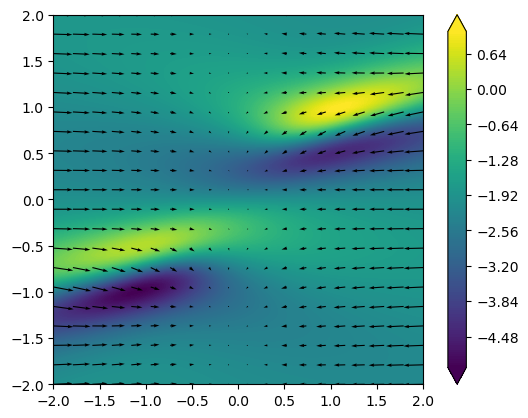

In [10]:
F2 = x**2+y**3/(y**4+(x-y)**2+1)
M2 = -F2.diff(x)
N2 = -F2.diff(y)
D2 = M2.diff(x)+N2.diff(y)
cmap = matplotlib.colormaps["viridis"]
ax,c = vector_fields.plot_contour(D2,(x,-2.2,2.2),(y,-2.2,2.2),levels=200,cmap=cmap,zorder=-100,extend='both')
vector_fields.plot_vector_field([M2,N2],(x,-2,2),(y,-2,2),zorder=10,ax=ax)
ax.set_aspect(1)
ax.figure.colorbar(c,ax=ax);

Betrachtet man hingegen das zugehörige Hamiltonsche Vektorfeld, so verschwindet die Divergenz.

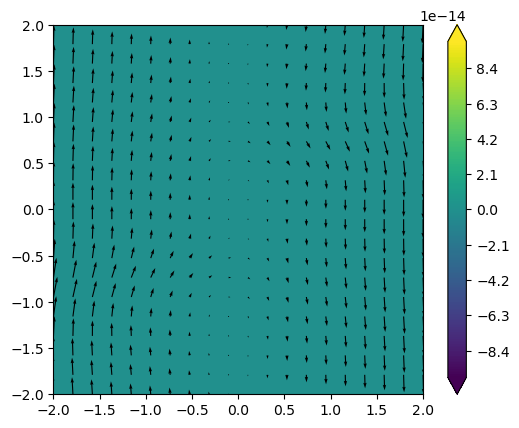

In [11]:
D3=-N2.diff(x)+M2.diff(y)
cmap = matplotlib.colormaps["viridis"]
ax,c = vector_fields.plot_contour(D3,(x,-2.2,2.2),(y,-2.2,2.2),levels=200,cmap=cmap,zorder=-100,extend='both')
vector_fields.plot_vector_field([-N2,M2],(x,-2,2),(y,-2,2),zorder=10,ax=ax)
ax.set_aspect(1)
ax.figure.colorbar(c,ax=ax);

# Lösungsfluss für Hamiltonsche Systeme

Betrachten wir nun, wie sich eine Menge unter dem Lösungsfluss eines Hamiltonschen Systems ändert.

Dazu starten wir mit eine Abbildung des Passauer Wolfs von https://commons.wikimedia.org/wiki/File:Wappen_Passau.svg (gemeinfrei)

In [12]:
from itertools import product

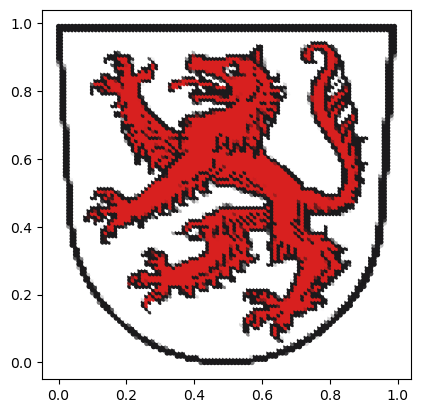

In [26]:
wappen = skimage.io.imread("wappen-passau.png")
wappen = skimage.img_as_float(wappen)
height, width, _ = wappen.shape
xrange = [k/float(width) for k in range(width)]
yrange = [k/float(height) for k in range(height)]
start = np.array(list(product(xrange,yrange)))
coloring = np.reshape(np.flip(wappen,0),(height*width,4),order="F")
xp = [p[0] for p in start]
yp = [p[1] for p in start] 
fig, ax = plt.subplots();
ax.scatter(xp,yp,color=coloring,s=15,edgecolors="none");
ax.set_aspect("equal")

Als Hamiltonsche Funktion verwenden wir diesmal:


In [13]:
F=(x+x**2-y)/(x**2+y**4+1.)
F

(x**2 + x - y)/(x**2 + y**4 + 1.0)

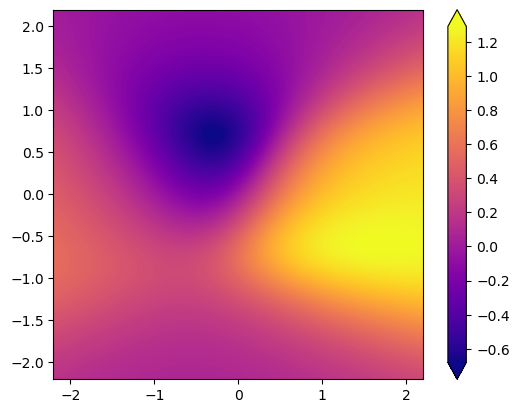

In [14]:
cmap = matplotlib.colormaps["plasma"]
#cmap = matplotlib.colormaps["viridis"]
ax,c = vector_fields.plot_contour(F,(x,-2.2,2.2),(y,-2.2,2.2),levels=200,cmap=cmap,zorder=-100,extend='both')
ax.set_aspect(1)
ax.figure.colorbar(c,ax=ax);

Ableiten ergibt

In [15]:
M = F.diff(x)
N = F.diff(y)

In [16]:
M

-2*x*(x**2 + x - y)/(x**2 + y**4 + 1.0)**2 + (2*x + 1)/(x**2 + y**4 + 1.0)

In [17]:
N

-4*y**3*(x**2 + x - y)/(x**2 + y**4 + 1.0)**2 - 1/(x**2 + y**4 + 1.0)

In [18]:
vector_fields.field_player([N,-M])

Damit können wir jetzt den Fluss auf unseren Passauer Wolf anwenden.

## Achtung: Das dauert eine Weile!

In [19]:
from sympy import lambdify

In [20]:
f=lambdify((t,(x,y)),(N,-M))
numN=lambdify((x,y),N)
numM=lambdify((x,y),M)

In [21]:
f(1,(2,2))

(-0.3378684807256236, -0.2018140589569161)

In [51]:
def plot_transformed(t,k):
    trajectories = [integ.solve_ivp(f,[0,t],y0=pl)["y"] for pl in start]
    finalpoints = [tuple(zip(*tra))[-1] for tra in trajectories]
    xpoints = np.linspace(-1.5,1.5,300)
    ypoints = np.linspace(-1.5,1.5,300)
    xgrid, ygrid = np.meshgrid(xpoints,ypoints)
    upoints = numN(xgrid,ygrid)
    vpoints = -numM(xgrid,ygrid)
    fig, ax = plt.subplots()
    ax.streamplot(xgrid,ygrid,upoints,vpoints,density=2);
    ax.set_aspect("equal");
    fig.dpi=100;
    fig.set_size_inches(10,10);
    xp = [p[0] for p in finalpoints]
    yp = [p[1] for p in finalpoints]
    ax.scatter(xp,yp,c=coloring,s=30,edgecolors="none",zorder=100);
    fig.savefig(f"wappen-transformiert-fein-{k}.png")
    plt.close(fig)
    
steps = 50
for k in range(steps):
    plot_transformed(1.5*k/steps,k)

# Der Wolf im Fluss

Jetzt können wir endlich das Ergebnis unserer Mühe als Animation darstellen:

In [22]:
steps = 50
pictures=[open(f"wappen-transformiert-fein-{k}.png","rb").read() for k in range(steps)]
slider=ipywidgets.IntSlider(value=0,min=0,max=steps-1)
im_widget=ipywidgets.Image(
    value=pictures[0],
    format='png',
    width=600,
    height=600
)
def handle_slider_change(change):
    im_widget.value = pictures[change.new]
    
play = ipywidgets.Play(
    value=0,
    min=0,
    max=steps-1,
    step=1,
    interval=100,
    description="Press play",
    disabled=False
)
slider = ipywidgets.IntSlider(max=steps-1)
ipywidgets.jslink((play, 'value'), (slider, 'value'))
slider.observe(handle_slider_change, names='value')
combined = ipywidgets.HBox([play, slider])
ipywidgets.VBox([combined,im_widget])